# Jakub Kosterna - praca domowa nr 2

<h1 id="tocheading">Spis treści</h1>
<div id="toc"></div>

In [969]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Wczytanie i ogląd

Póki co wiem że przez te dwa tygodnie mamy się zabawić ze zbiorem dotyczącym *Allegro*. Czyli konkretnie... ?

Na początek wczytam te obowiązkowe pakiety...

In [53]:
import pandas as pd
import numpy as np

... odtworzę moje dane...

In [54]:
data = pd.read_csv("allegro-api-transactions.csv")
data.sample(10)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
384335,384335,2016-04-03 11:07:48,5971390124,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Trawy']",1,0,akex-Albamar,7.99,1,99618,0,29330,Dobrodzień,Dom i Ogród
64965,64965,2016-04-03 16:55:22,6094873189,"['Dom i Ogród', 'Utrzymanie czystości', 'Worki...",1,0,Martomzoo,2.78,0,303,0,7817,Zielona Góra,Dom i Ogród
407280,407280,2016-04-03 19:15:33,6048838705,"['Dla Dzieci', 'Pokój dziecięcy', 'Pościel i k...",1,1,betaxbis,35.90,0,997,0,3554,Koniecpo,Dla Dzieci
409184,409184,2016-04-03 19:33:31,6032948704,"['Dom i Ogród', 'Ogród', 'Meble ogrodowe', 'Hu...",1,1,annabroda132_bb,65.00,0,496,0,1995,KRZESZÓW,Dom i Ogród
263306,263306,2016-04-03 22:36:01,5953233135,"['Telefony i Akcesoria', 'Akcesoria GSM', 'Ład...",1,1,kopier_mokotow,35.90,0,981,0,5209,Warszawa Giełda Elektroniczna,Telefony i Akcesoria
308927,308927,2016-04-03 23:09:04,5930345649,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Byliny oz...",1,1,Mayla_PL,7.40,0,916,0,915,Siedlakowice,Dom i Ogród
180983,180983,2016-04-03 16:15:58,4987640154,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,Noemi-bielizna,1.00,1,0,0,39269,GĄBIN,"Odzież, Obuwie, Dodatki"
228137,228137,2016-04-03 16:16:32,5941028644,"['Biżuteria i Zegarki', 'Biżuteria damska', 'Z...",1,0,salonmasandra,5.99,0,2,0,1637,Warszawa,Biżuteria i Zegarki
231523,231523,2016-04-03 22:31:59,5364222114,"['Dla Dzieci', 'Zabawki', 'Gry', 'Podróżne']",1,1,Nefere_pl,65.00,1,6,0,34103,Mykanów Częstochowa,Dla Dzieci
261323,261323,2016-04-03 17:20:32,5982816732,"['Odzież, Obuwie, Dodatki', 'Odzież damska', '...",1,1,butiqjula,29.00,0,9790,0,100585,kobylnica,"Odzież, Obuwie, Dodatki"


In [55]:
data.shape

(420020, 14)

In [56]:
data.dtypes

lp                          int64
date                       object
item_id                     int64
categories                 object
pay_option_on_delivery      int64
pay_option_transfer         int64
seller                     object
price                     float64
it_is_allegro_standard      int64
it_quantity                 int64
it_is_brand_zone            int64
it_seller_rating            int64
it_location                object
main_category              object
dtype: object

Wow - niby tylko 14 kolumn, ale ponad 400 tysięcy wierszy. Czy to już big data? Chyba jeszcze nie, ale więcej to niż pierwszy lepszy zbiór którym się wcześniej bawiłem.

Zbiór chyba jasny - mamy informacje o produktach z serwisu aukcyjnego i ich parametry. Nawet bez znajomości treści naszego zadania instynktownie przychodzi co będzie naszą **zmienną celu** - i oczywiście myślę tu o kolumnie *price*. Do jej wyznaczania strzelam że najbardziej kluczowa będzie główna kategoria (*main category*), data \[wypuszczenia produktu?\] (*date*), a także *it_seller_rating* - punkty sprzedawcy \[zapewne więcej <-> bardziej doświadczony, bardziej zaufany\]. No ale zobaczymy.

# Target encoding dla it_location

Wykonajmy nasze pierwsze kodowanie dla kolumny *it_location* - ograniczona liczba miast do wyboru powinna dać nam satysfakcjonujący efekt prawdopodobnie kilkudziesięciu do kilkuset różnych lokacji.

In [60]:
import category_encoders
te = category_encoders.target_encoder.TargetEncoder(data)

encoded = te.fit_transform(data['it_location'], data['price'])
data['it_location_encoded'] = encoded

In [61]:
data[['it_location', 'price', 'it_location_encoded']].sample(10)

,it_location,price,it_location_encoded
271271,Głogów,69.99,106.536691
321657,WARSZAWA,69.99,74.329794
44319,ZGIERZ,3.90,35.129074
148467,RUMIA,29.99,97.266471
419263,Lublin,28.00,48.102140
382092,Polska,3.98,53.590671
412084,Wąbrzeźno,300.00,58.426383
24540,Tarnowskie Góry,11.00,45.548671
350858,Poznąń,99.00,71.462670
100418,Gliwice,1.00,146.998586


Z oczywistych względów w wypadku naszej ramki *target jest zdecydowanie lepszy niż one-hot* - co najważniejsze mamy zchowane własności tego drugiego - każde miasto dostało swój unikalny numerek; ale co ważniejsze te liczby nie są przypadkowe i są ściśle powiązane ze średnią ceną dla tego miasta. Pojedyncze wiersze może nie dadzą nam tu multum informacji, ale biorąc pod uwagę, że dla takiej Woli Krzysztoporskiej dostajemy znacznie mniejszy identyfikator w porównaniu np. do takiej Warszawy co jest śliśle powiązane z naszą zmienną celu, jest już zdecydowanie satysfakcjonujące.

# Encoding dla main_category

W naszej ramce danych rzeczywiście większość kolumn nie wymaga category encoding - zwykle mamy do czynienia z wartościami prawda / fałsz \[np. *pay_option_transfer*, *pay_option_on_delivery*\] albo posiadających tak wiele wartości, że ciężko byłoby zrobić z nimi coś sensownego i nie miałoby to raczej sensu \[np. *seller*\].

Mądze jest więc zakodować akurat *main_category* - jak sama nazwa wskazuje dotyczy ona tylko jednej kategorii. Przeciwnie także co do kolumn wielowartościowych takich jak identyfikator przedmiotu czy nazwa sprzedawcy na pewno będzie ona przydatna przy implementacji algorytmów uczenia maszynowego. Razem z chociażby datą, "punktami" sprzedawcy (*it_seller_rating*) czy parametrami prawda / fałsz produktu będziemy mogli otrzymać potencjalnie przybliżoną predykcję ceny.

## One-hot encoding

In [68]:
values = np.array(data[["main_category"]])

from sklearn.preprocessing import LabelEncoder

# integer encode
le = LabelEncoder()
integer_encoded = le.fit_transform(values)
print(integer_encoded)

#invert
print(le.inverse_transform(integer_encoded))

[12 18  6 ... 18  5 15]
['Komputery' 'Odzież, Obuwie, Dodatki' 'Dom i Ogród' ...
 'Odzież, Obuwie, Dodatki' 'Dla Dzieci' 'Motoryzacja']


In [69]:
category_series = pd.concat([pd.DataFrame(integer_encoded),pd.DataFrame(le.inverse_transform(integer_encoded))], axis = 1)
category_series = category_series.drop_duplicates()
category_series.columns = ["Index", "Category"]
category_series = category_series.sort_values("Index")
category_series

,Index,Category
1940,0,Antyki i Sztuka
6533,1,Bilety
406,2,Biuro i Reklama
7,3,Biżuteria i Zegarki
48,4,Delikatesy
22,5,Dla Dzieci
2,6,Dom i Ogród
151,7,Filmy
249,8,Fotografia
59,9,Gry


In [70]:
from sklearn.preprocessing import OneHotEncoder

# one hot encode
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

# invert 
inverted = onehot_encoder.inverse_transform(onehot_encoded)
print(inverted.transpose())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[12 18  6 ... 18  5 15]]


In [71]:
onehot_encoded = pd.DataFrame(onehot_encoded)
onehot_encoded.columns = category_series["Category"]
onehot_encoded

Category,Antyki i Sztuka,Bilety,Biuro i Reklama,Biżuteria i Zegarki,Delikatesy,Dla Dzieci,Dom i Ogród,Filmy,Fotografia,Gry,...,Nieruchomości,"Odzież, Obuwie, Dodatki",Przemysł,RTV i AGD,Rękodzieło,Sport i Turystyka,"Sprzęt estradowy, studyjny i DJ-ski",Telefony i Akcesoria,Uroda,Zdrowie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
420016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
420017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420018,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
data_onehot = pd.concat([data, onehot_encoded], axis = 1)
data_onehot.sample(10)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,...,Nieruchomości,"Odzież, Obuwie, Dodatki",Przemysł,RTV i AGD,Rękodzieło,Sport i Turystyka,"Sprzęt estradowy, studyjny i DJ-ski",Telefony i Akcesoria,Uroda,Zdrowie
207908,207908,2016-04-03 20:46:32,6078273742,"['Zdrowie', 'Korekcja wzroku', 'Soczewki konta...",0,1,jablonskimiros,5.99,0,532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
375678,375678,2016-04-03 11:46:48,5624027752,"['Sport i Turystyka', 'Wędkarstwo', 'Przynęty'...",1,1,FISHING-SHOP,7.00,1,3464,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
240716,240716,2016-04-03 14:51:27,6007246854,"['Uroda', 'Manicure i pedicure', 'Lakiery hybr...",1,1,84dorado,4.75,0,98941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
173872,173872,2016-04-03 23:13:40,6042813358,"['Odzież, Obuwie, Dodatki', 'Odzież damska', '...",1,1,babababie,99.95,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50037,50037,2016-04-03 12:29:22,4946606287,"['RTV i AGD', 'Elektronika', 'Kable, przewody'...",1,1,Lvt_electronics,21.00,1,948,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
285583,285583,2016-04-03 20:00:26,5572261100,"['Telefony i Akcesoria', 'Akcesoria GSM', 'Uch...",1,1,Szymbel,23.99,1,612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13077,13077,2016-04-03 18:33:17,4806730596,"['Motoryzacja', 'Części samochodowe', 'Układ e...",1,1,dzik02,10.00,1,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24315,24315,2016-04-03 17:55:26,5053065179,"['Motoryzacja', 'Akcesoria samochodowe', 'Akce...",1,1,tuning_shop_pl,13.25,1,99187,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
418807,418807,2016-04-03 12:28:46,5840278807,"['Motoryzacja', 'Akcesoria samochodowe', 'Dywa...",1,1,autofura_pl,98.00,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263774,263774,2016-04-03 20:38:25,6059945735,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,0,agastyl_com_pl,59.90,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Tak oto otrzymaliśmy potężną 42-kolumnową data frame, gdzie ostatnie 27 odpowiadają za przyporządkowanie do głównej kategorii produktu.

## Binary encoding

Brzmi wdzięcznie, pewnie coś z bitami.

A zera i jedynki to sama przyjemność, czyż nie?

In [74]:
bin_e = category_encoders.BinaryEncoder(cols = ['main_category'])
bin_e.fit_transform(data)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5,it_location_encoded
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,0,0,0,0,0,1,85.423398
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,0,0,0,0,1,0,85.423398
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,0,0,0,0,1,1,61.990914
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,0,0,0,1,0,0,35.433365
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,0,0,0,0,1,0,117.191956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,Kraśnik,0,0,0,1,1,0,24.306929
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,Dzierżoniów,0,0,1,0,0,1,66.785334
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,Supraśl,0,0,0,0,1,0,18.682800
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,Poznań,0,0,1,0,0,0,106.203076


*Binary encoding* na chłopski rozum wydaje się być sensowniejszy niż *one hot* - zamiast 27 dodatkowych kolumn po jednej na każdą kategorię, tu dostajemy ich jedynie 5 - mimo, że wciąż zostajemy w obszarze bitów.

Zalety? Mniejsza ramka danych, zachowanie unikalności oznaczeń kategorii, spójność i szybszy transfer.

Wady? Słaba przejrzystość bez wiedzy o zastosowaniu metody \[zwłaszcza dla osób spoza branży\] i prawdopodobnie łatwe wpadnięcie w pułapkę wykrywania podobieństwa między kategoriami o większości bitów wspólnych z tych 5 kolumn przez źle napisane algorytmy uczenia maszynowego - np. *Antyki i sztuka* oraz *bilety* w czterech na pięć kolumn odpowiadających za bity kategorii mają tą samą wartość, co mogłoby mylić, że mają ze sobą coś wspólnego - a są to jednak dwa zupełnie odmienne byty.

## Polynomial encoding

Kodowanie wielomianowe, a cóż to takiego?

In [107]:
pe = category_encoders.PolynomialEncoder(cols = ['main_category'])
pe.fit_transform(data)

,intercept,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,...,main_category_17,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25,it_location_encoded
0,1,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,...,0.001117,-0.000478,0.000189,-0.000069,0.000022,-0.000006,0.000002,-3.206860e-07,4.490498e-08,85.423398
1,1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,...,-0.013576,0.006512,-0.002868,0.001149,-0.000413,0.000131,-0.000035,7.696464e-06,-1.167529e-06,85.423398
2,1,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,...,0.071643,-0.039341,0.019631,-0.008835,0.003543,-0.001243,0.000370,-8.818865e-05,1.459412e-05,61.990914
3,1,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,...,-0.209481,0.136451,-0.079261,0.040921,-0.018611,0.007334,-0.002432,6.413720e-04,-1.167530e-04,35.433365
4,1,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,...,-0.013576,0.006512,-0.002868,0.001149,-0.000413,0.000131,-0.000035,7.696464e-06,-1.167529e-06,117.191956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,1,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,...,-0.269274,0.354461,-0.340354,0.262732,-0.167967,0.089180,-0.038617,1.298137e-02,-2.953850e-03,24.306929
420016,1,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,...,-0.021544,0.253169,-0.256279,0.031345,0.237827,-0.370952,0.327745,-1.926922e-01,7.015395e-02,66.785334
420017,1,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,...,-0.013576,0.006512,-0.002868,0.001149,-0.000413,0.000131,-0.000035,7.696464e-06,-1.167529e-06,18.682800
420018,1,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,...,0.284881,-0.195003,-0.043363,0.269735,-0.366463,0.323213,-0.207995,9.736026e-02,-2.953850e-02,106.203076


Jak udalo mi się zrozumieć owe kodowanie przypisuje w 27 dodatkowych kolumnach specjalne wartości wyliczone za pomocą mądrze dobranych wzorów i zależności matematycznych. Ale to chyba jeszcze nie ten poziom!

# Uzupełnianie braków

## Przygotowanie pomocniczych ramek danych

Ograniczmy nasz zbiór do wskazanych zmiennych numerycznych.

W tym wypadku *price* będziemy traktować jako zmienną objaśniającą.

In [879]:
data_4 = data[["it_seller_rating", "it_quantity", "price"]]
data_4.head()

,it_seller_rating,it_quantity,price
0,50177,997,59.99
1,12428,9288,4.90
2,7389,895,109.90
3,15006,971,18.50
4,32975,950,19.90


Usuńmy losowe 10% wierszy.

In [880]:
np.random.seed(1234)
removed_ids = np.random.choice(len(data_4), len(data_4) // 10, replace=False)
removed_ids

array([394978, 255059, 153172, ..., 308257, 160454, 251647])

In [881]:
removed_ids.sort()
removed_ids

array([    22,     34,     51, ..., 419984, 419987, 420006])

In [882]:
to_remove = pd.DataFrame(data_4.iloc[removed_ids]).reset_index()
remove_ids = pd.DataFrame(removed_ids)
remove_ids.columns = ["index"]
to_remove = to_remove.merge(remove_ids, on = "index")
before_remove = to_remove.copy()
to_remove[["it_seller_rating"]] = np.nan
to_remove

,index,it_seller_rating,it_quantity,price
0,22,NaN,3,29.00
1,34,NaN,4023,6.90
2,51,NaN,4,26.37
3,79,NaN,993,97.00
4,80,NaN,93,9.50
...,...,...,...,...
41997,419977,NaN,30024,49.99
41998,419979,NaN,30024,49.99
41999,419984,NaN,41,36.99
42000,419987,NaN,0,25.99


In [883]:
removed = to_remove.copy()
removed[["it_seller_rating"]] = np.nan
removed

,index,it_seller_rating,it_quantity,price
0,22,NaN,3,29.00
1,34,NaN,4023,6.90
2,51,NaN,4,26.37
3,79,NaN,993,97.00
4,80,NaN,93,9.50
...,...,...,...,...
41997,419977,NaN,30024,49.99
41998,419979,NaN,30024,49.99
41999,419984,NaN,41,36.99
42000,419987,NaN,0,25.99


In [885]:
data_4_removed = data_4.copy().reset_index()
data_4_removed = data_4_removed.merge(to_remove, on = "index", how = "left")
data_4_removed = data_4_removed.drop(["index", "it_seller_rating_y", "price_y"], axis = 1)
data_4_removed["it_seller_rating"] = np.where(data_4_removed["it_quantity_x"] == data_4_removed["it_quantity_y"], np.nan, data_4_removed["it_seller_rating_x"])   
data_4_removed = data_4_removed.drop(["it_seller_rating_x", "it_quantity_y"], axis = 1)
data_4_removed.columns = ["it_quantity", "price", "it_seller_rating"]

In [886]:
data_4_removed.sample(15)

,it_quantity,price,it_seller_rating
138132,966,46.35,16666.0
348186,191,129.99,19398.0
76158,183,11.00,NaN
28394,0,117.00,44314.0
255419,857,19.99,4323.0
293823,99988,28.49,107754.0
29859,41,824.00,6984.0
79566,99,9.90,NaN
12615,0,15.00,11914.0
167176,9238,87.50,16056.0


## Multivariate feature imputation

### Pierwsze wypełnianie

Użyjmy gotowych narzędzi do znalezienia spodziewanych wartości *it_seller_rating*.

In [887]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(data_4)

IterativeImputer(random_state=0)

filled = pd.DataFrame(imp.transform(to_remove.drop(["index"], axis = 1)))
filled.columns = ["it_seller_rating", "it_quantity", "price"]

In [888]:
filled["index"] = removed_ids
filled

,it_seller_rating,it_quantity,price,index
0,19947.500384,3.0,29.00,22
1,20259.626936,4023.0,6.90,34
2,19949.699834,4.0,26.37,51
3,19964.991986,993.0,97.00,79
4,19969.853263,93.0,9.50,80
...,...,...,...,...
41997,22128.034970,30024.0,49.99,419977
41998,22128.034970,30024.0,49.99,419979
41999,19943.822344,41.0,36.99,419984
42000,19949.714253,0.0,25.99,419987


In [889]:
sample_10_to_check = np.random.choice(len(removed), 10, replace=False)
sample_10_to_check

array([ 5465, 12829, 15693, 20019,  9819,  9641, 18372, 30432, 14562,
       38811])

In [890]:
compare = before_remove.iloc[sample_10_to_check].merge(filled.iloc[sample_10_to_check], on = 'price')
compare = compare.drop(["index_x", "it_quantity_x", "it_quantity_y", "price", "index_y"], axis = 1)

In [891]:
compare

,it_seller_rating_x,it_seller_rating_y
0,18234,20004.989240
1,1654,19935.153881
2,1066,19914.942371
3,13065,20013.709727
4,999,19946.480412
5,3347,19950.918859
6,64317,19984.862276
7,43312,19992.911086
8,131840,19824.149027
9,388,18839.763215


### Wnioski z próby na pierwszej 10% usuniętych danych

Na pierszy rzut oka *Multivariate feature imputation* zdaje się dać taki sobie efekt - przewidywana liczba punktów wystawcy zdaje się być bardzo zbliżona niezależnie od produktu.

Do "mądrej" weryfikacji narzędzia skorzystamy z miary RMSE - jest to pierwiastek średniego kwadratu błędu prognoz.

In [892]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(before_remove["it_seller_rating"], filled["it_seller_rating"]))

In [893]:
rms

37179.04612728276

Jak widać *Multivariate feature imputation* dla standardowych parametrów okazało się mało użyteczne -  przewidziana ocena sprzedawcy nawet nie jest podobna do jego prawdziwej.

### Kolejne 9 prób i odchylenie standardowe MFI powtórzonego wielokrotnie

In [894]:
deviatons = [0] * 10
deviatons[0] = rms

Powtórzmy nasz eksperyment 10 razy i obliczmy odchylenie standardowe wyniku.

Wpierw wylosujmy seedy do kolejnych losowań.

In [895]:
np.random.seed(100)
random_seeds = np.random.choice(10000, 9)
random_seeds

array([5640, 6936, 8039,   79,  350, 4149, 7906, 5646,  802])

In [896]:
for i in range(1, 10):
    np.random.seed(random_seeds[i-1])
    removed_ids = np.random.choice(len(data_4), len(data_4) // 10, replace=False)
    removed_ids.sort()
    
    to_remove = pd.DataFrame(data_4.iloc[removed_ids]).reset_index()
    remove_ids = pd.DataFrame(removed_ids)
    remove_ids.columns = ["index"]
    
    to_remove = to_remove.merge(remove_ids, on = "index")
    before_remove = to_remove.copy()
    to_remove[["it_seller_rating"]] = np.nan
    
    removed = to_remove.copy()
    removed[["it_seller_rating"]] = np.nan
    
    data_4_removed = data_4.copy().reset_index()
    data_4_removed = data_4_removed.merge(to_remove, on = "index", how = "left")
    data_4_removed = data_4_removed.drop(["index", "it_seller_rating_y", "price_y"], axis = 1)
    data_4_removed["it_seller_rating"] = np.where(data_4_removed["it_quantity_x"] == data_4_removed["it_quantity_y"], np.nan, data_4_removed["it_seller_rating_x"])   
    data_4_removed = data_4_removed.drop(["it_seller_rating_x", "it_quantity_y"], axis = 1)
    data_4_removed.columns = ["it_quantity", "price", "it_seller_rating"]
    
    filled = pd.DataFrame(imp.transform(to_remove.drop(["index"], axis = 1)))
    filled.columns = ["it_seller_rating", "it_quantity", "price"]
    
    filled["index"] = removed_ids
    
    rms = sqrt(mean_squared_error(before_remove["it_seller_rating"], filled["it_seller_rating"]))
    
    deviatons[i] = rms

In [897]:
deviatons

[37179.04612728276,
 36334.62195280395,
 36678.8423702405,
 36665.19527197796,
 36306.8980834002,
 36494.65950282911,
 36072.19905416971,
 36563.26638453268,
 36660.78782086709,
 36975.924750923965]

In [898]:
import statistics
statistics.stdev(deviatons)

322.7760777520296

Mimo takich sobie wartości miar RMSE, ich odchylenie standardowe jest satysfakcjonująco małe.

### Usunięcie wierszy z *it_quantity*

Przygotuję ziarna do wylosowania 10 zestawów danych z usuniętymi po 10% kolejno: *it_seller_rating* i *it_quantity*.

In [919]:
np.random.seed(200)
random_seeds = np.random.choice(10000, 10)
random_seeds

array([1818,  784, 9036, 8377, 7769,  902, 7210, 5633, 7067, 3215])

In [920]:
deviatons2 = [0] * 10

Wylosuję *id* wierszy do usunięcia - oczywiście mogą się one powtórzyć.

In [921]:
np.random.seed(random_seeds[0])

removed_ids_1 = np.random.choice(len(data_4), len(data_4) // 10, replace=False)
removed_ids_2 = np.random.choice(len(data_4), len(data_4) // 10, replace=False)
removed_ids_1.sort()
removed_ids_2.sort()

print(removed_ids_1)
print(removed_ids_2)

[     2      6     10 ... 420012 420013 420017]
[    33     41     53 ... 420002 420009 420015]


In [922]:
removed_ids = pd.concat((pd.DataFrame(removed_ids_1), pd.DataFrame(removed_ids_2)), axis = 0)
removed_ids = removed_ids.drop_duplicates().reset_index()
removed_ids = removed_ids.drop(["index"], axis = 1)
removed_ids.columns = ["index"]
removed_ids

,index
0,2
1,6
2,10
3,11
4,16
...,...
79811,419978
79812,419987
79813,419989
79814,420009


Przygotuję ramkę danych z wierszami do usunięcia - aby odróżnić gdzie usuwam *it_quantity*, gdzie *it_seller_rating*, a gdzie oba - dodam dwie pomocnicze binarne kolumny *no_rating* i *no_quantity* zawierające informacje o brakach w danym wierszu.

In [923]:
to_remove_1 = pd.DataFrame(data_4.iloc[removed_ids_1]).reset_index()
to_remove_2 = pd.DataFrame(data_4.iloc[removed_ids_2]).reset_index()
to_remove = pd.concat((pd.DataFrame(to_remove_1), pd.DataFrame(to_remove_2)), axis = 0)
to_remove = to_remove.drop_duplicates()

before_remove = to_remove.copy()
to_remove

,index,it_seller_rating,it_quantity,price
0,2,7389,895,109.90
1,6,39371,742,10.99
2,10,5430,0,1.50
3,11,5235,986,47.99
4,16,16399,99643,23.89
...,...,...,...,...
41996,419978,3050,30024,49.99
41997,419987,587,0,25.99
41998,419989,203,8,4.49
42000,420009,59,0,200.00


In [924]:
to_remove = to_remove_1.merge(to_remove, on = "index", how = "right")
to_remove["no_rating"] = np.where(to_remove["price_x"] == to_remove["price_x"], 1, 0)
to_remove = to_remove.drop(["it_seller_rating_x", "it_quantity_x", "price_x"], axis = 1)
to_remove.columns = ["index", "it_seller_rating", "it_quantity", "price", "no_rating"]

to_remove = to_remove_2.merge(to_remove, on = "index", how = "right")
to_remove["no_quantity"] = np.where(to_remove["price_x"] == to_remove["price_x"], 1, 0)
to_remove = to_remove.drop(["it_seller_rating_x", "it_quantity_x", "price_x"], axis = 1)
to_remove.columns = ["index", "it_seller_rating", "it_quantity", "price", "no_rating", "no_quantity"]

to_remove.sample(15)

,index,it_seller_rating,it_quantity,price,no_rating,no_quantity
65065,256248,63686,594,2.98,1,0
23700,237362,226,0,50.00,1,1
36858,368521,5193,7,4.99,0,1
74901,365888,869,71,25.00,1,0
10553,104637,4502,99438,7.99,0,1
69015,300985,13506,15,139.00,1,0
68625,296232,44967,176,75.90,1,0
77919,399157,472,9999,64.99,1,0
8996,89227,123680,901,28.99,0,1
76296,381283,4921,19,159.00,1,0


Jak widać zwykle jest jeden brak, ale raz na jakiś czas w wierszu będzie informacja tylko o cenie.

No dobra, czas usunąć informacje!

In [925]:
removed = to_remove.copy()
removed["it_quantity"] = np.where(removed["no_quantity"] == 1, np.nan, removed["it_quantity"])
removed["it_seller_rating"] = np.where(removed["no_rating"] == 1, np.nan, removed["it_seller_rating"])
removed = removed.drop(["no_rating", "no_quantity"], axis = 1)
removed.sample(15)

,index,it_seller_rating,it_quantity,price
30490,305559,89052.0,NaN,29.00
54643,141125,NaN,20.0,162.00
41393,413886,5592.0,NaN,69.98
14245,141818,115968.0,NaN,12.00
48512,73051,NaN,299.0,12.50
17112,171140,19387.0,NaN,25.90
62684,230313,NaN,985.0,13.88
14094,140219,19257.0,NaN,34.99
60791,209699,NaN,9.0,24.90
59653,197392,NaN,75.0,6.70


Znowu wszystko zgodnie z planem, wiwat!!

In [926]:
filled = pd.DataFrame(imp.transform(removed.drop(["index"], axis = 1)))
filled.columns = ["it_seller_rating", "it_quantity", "price"]

In [927]:
filled["index"] = removed_ids
filled

,it_seller_rating,it_quantity,price,index
0,144576.000000,10554.504551,6.90,2
1,3016.000000,6349.257666,5.30,6
2,12747.000000,6540.185009,64.99,10
3,33112.000000,7236.615598,9.70,11
4,29498.000000,7112.221948,20.00,16
...,...,...,...,...
79811,27153.696784,99985.000000,168.00,419978
79812,19918.176212,0.000000,65.00,419987
79813,27285.457265,99998.000000,6.20,419989
79814,19947.280787,0.000000,29.00,420009


In [928]:
sample_10_to_check = np.random.choice(len(removed), 10, replace=False)
sample_10_to_check

array([78272, 26042, 37909, 58533, 28900, 29917, 28820, 67191, 67551,
       72321])

In [929]:
compare = before_remove.iloc[sample_10_to_check].merge(filled.iloc[sample_10_to_check], on = 'index')
compare = compare.drop(["index", "price_x", "price_y"], axis = 1)
compare.columns = ["it_seller_rating_correct", "it_quantity_correct", "it_seller_rating_predicted", "it_quantity_predicted"]
compare

,it_seller_rating_correct,it_quantity_correct,it_seller_rating_predicted,it_quantity_predicted
0,143883,330,18685.171425,98.000000
1,143462,15,15180.000000,6675.087117
2,6270,989,2171.000000,6327.928765
3,1892,7,19938.834563,5.000000
4,288709,1,1203.000000,6155.839655
5,9086,473,104.000000,6025.981001
6,1944,3,14.000000,6178.992209
7,820,0,19635.288265,1.000000
8,3081,99,20026.668557,991.000000
9,3322,92,20022.259368,947.000000


Ciekawe wrażenie, ale nagle wartości przybliżone wydają się na pierwszy rzut oka być bardziej zbliżone.

To zapewne iluzja spowodowana przedstawieniem ich w innej postaci.

Co na to miara RMSE?

In [930]:
rms = sqrt(mean_squared_error(before_remove["it_seller_rating"], filled["it_seller_rating"]))
rms

44599.67980161753

Jednak zgodnie ze zdrowym rozsądkiem większa!
Więcej braków <-> większy błąd

Dokojamy automatyzacji - takiej samej, jak wcześniej.

In [931]:
deviatons2[0] = rms
for i in range(1, 10):
    np.random.seed(random_seeds[i-1])
    
    removed_ids_1 = np.random.choice(len(data_4), len(data_4) // 10, replace=False)
    removed_ids_2 = np.random.choice(len(data_4), len(data_4) // 10, replace=False)
    removed_ids_1.sort()
    removed_ids_2.sort()
    
    removed_ids = pd.concat((pd.DataFrame(removed_ids_1), pd.DataFrame(removed_ids_2)), axis = 0)
    removed_ids = removed_ids.drop_duplicates().reset_index()
    removed_ids = removed_ids.drop(["index"], axis = 1)
    removed_ids.columns = ["index"]
    
    to_remove_1 = pd.DataFrame(data_4.iloc[removed_ids_1]).reset_index()
    to_remove_2 = pd.DataFrame(data_4.iloc[removed_ids_2]).reset_index()
    to_remove = pd.concat((pd.DataFrame(to_remove_1), pd.DataFrame(to_remove_2)), axis = 0)
    to_remove = to_remove.drop_duplicates()

    before_remove = to_remove.copy()
    
    to_remove = to_remove_1.merge(to_remove, on = "index", how = "right")
    to_remove["no_rating"] = np.where(to_remove["price_x"] == to_remove["price_x"], 1, 0)
    to_remove = to_remove.drop(["it_seller_rating_x", "it_quantity_x", "price_x"], axis = 1)
    to_remove.columns = ["index", "it_seller_rating", "it_quantity", "price", "no_rating"]

    to_remove = to_remove_2.merge(to_remove, on = "index", how = "right")
    to_remove["no_quantity"] = np.where(to_remove["price_x"] == to_remove["price_x"], 1, 0)
    to_remove = to_remove.drop(["it_seller_rating_x", "it_quantity_x", "price_x"], axis = 1)
    to_remove.columns = ["index", "it_seller_rating", "it_quantity", "price", "no_rating", "no_quantity"]
    
    removed = to_remove.copy()
    removed["it_quantity"] = np.where(removed["no_quantity"] == 1, np.nan, removed["it_quantity"])
    removed["it_seller_rating"] = np.where(removed["no_rating"] == 1, np.nan, removed["it_seller_rating"])
    removed = removed.drop(["no_rating", "no_quantity"], axis = 1)
    
    filled = pd.DataFrame(imp.transform(removed.drop(["index"], axis = 1)))
    filled.columns = ["it_seller_rating", "it_quantity", "price"]
    
    filled["index"] = removed_ids
    
    rms = sqrt(mean_squared_error(before_remove["it_seller_rating"], filled["it_seller_rating"]))
    
    deviatons2[i] = rms

In [932]:
deviatons2

[44599.67980161753,
 44599.67980161753,
 45208.34389796253,
 44574.301841197135,
 45398.76114044136,
 45174.39862950596,
 44223.596188474316,
 44295.17380242332,
 44664.73847025106,
 44548.37173725458]

In [935]:
statistics.stdev(deviatons2)

396.44291554594764

Odchylenie standardowe wyszło wyraźnie nieco większe.

### Wnioski i wykresy

Jak można się było spodziewać, **przewidywanie wartości brakujących wartości z kolumny mając do dyspozycji jedynie trzy słabo skorelowane ze sobą kolumki ramki danych nie przyniosło należytych efektów**.

Fajnie, że profesjonalne napisane już narzędzie informatyczne daje "jakieś" wyniki, ale jako porządni analitycy danych powinniśmy mocno zastanowić się nad warunkami i danymi wejściowymi przed ich użyciem.

Prawdopodobnie chociażby **gdyby skorzystać z większej ilości kolumn niż tylko tych trzech, wynik byłby o wiele bardziej satysfakcjonujący** - niestety w tym wypadku przydatnych danych było o wiele za mało.

Biorąc pod uwagę wartości miary RMSE i odchylenia standardowe dla przypadów gdzie: a) w jednej z trzech kolumn brakuje 10% wartości b) w dwóch trzech kolumn następuje owy szum; można więc strzelać, że im więcej braków danych, tym przybliżony wynik działania **Multivariate feature imputation jest gorszy**, a także i **wyniki są coraz mniej bliskie rzeczywistości** - jest to na szczęście jak najbardziej zgodne z intuicją.

Podsumowawczo zobaczmy jeszcze wyniki miar RMSE dla obu problemów - wypełniania 10% braków z 1 z 3 kolumn z ramki danych zestawione z wynikami tej miary dla usunięcia po 10% danych dla 2 kolumn (przy losowaniu ze zwracaniem).

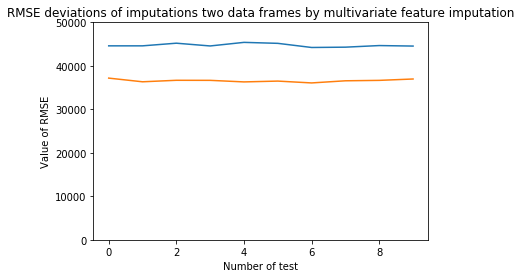

In [936]:
import matplotlib.pyplot as plt

plt.plot(deviatons2)
plt.plot(deviatons)

plt.ylim(0, 50000)
plt.xlabel("Number of test")
plt.ylabel("Value of RMSE")
plt.title("RMSE deviations of imputations two data frames by multivariate feature imputation")
plt.show()

Jak będą wyglądać dane dla pierwotnego 3-kolumnowego zbioru, a jak dla uzupełnionymi brakami danych dla jednego z dziesięciu przypadków usunięcia 10% wartości *it_quantity* i 10% *it_seller_rating*?

Przed usunięciem danych:

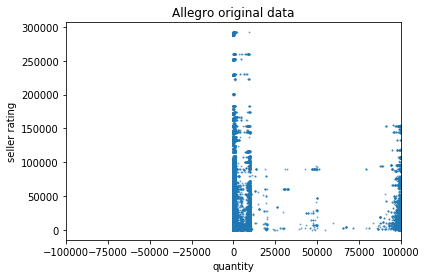

In [966]:
plt.scatter(before_remove[["it_quantity"]], before_remove[["it_seller_rating"]], s = 1, alpha = 0.5)

plt.title("Allegro original data")
plt.xlabel("quantity")
plt.ylabel("seller rating")
plt.xlim(-100000, 100000)

plt.show()

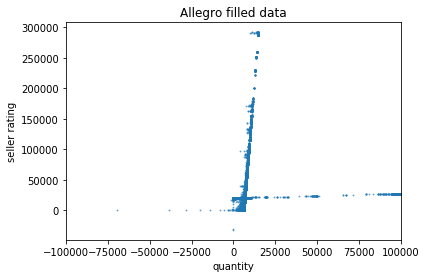

In [965]:
plt.scatter(filled[["it_quantity"]], filled[["it_seller_rating"]], s = 1, alpha = 0.5)

plt.title("Allegro filled data")
plt.xlabel("quantity")
plt.ylabel("seller rating")
plt.xlim(-100000, 100000)

plt.show()

Wizualizacje jeszcze konkretniej ukazują, że tym bardziej robotę zaimplementowanego *multivariate feature imputation* można wyrzucić do kosza - niedość, że dane są mocno skumulowane wokół dwóch prostych (jednej zbliżonej do x = 0, a drugiej do lekko pochylonej w prawo y = 0), to ponadto mamy styczność z pojedynczymi wartościami ujemnymi dla *it_quantity*... które docelowo są nieujemne. Tak czy inaczej trudno, żeby na podstawie tak małej ilości danych algorytm zrobił coś sensowniejszego - problem był po prostu nie do ogarnięcia korzystając z dostępnych narzędzi i danych.

To by było na tyle. Dobra praca domowa, fajnie się bawiłem, dziękuję!